## Импорт библиотек

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, shapiro
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


import seaborn as sns
import matplotlib.pyplot as plt

## Считывание файла

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-pak/statistic/lesson 10/dating_data.csv')

Смотрю на структуру:

In [3]:
df.head()

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1


In [4]:
df.shape

(14514, 4)

In [5]:
df.dtypes

user_id_1    int64
user_id_2    int64
group        int64
is_match     int64
dtype: object

## Формулировка гипотез  
Нулевая гипотеза: алгоритм не повлиял на количество мэтчей, контрольная и экспериментальная группы не различаются, наблюдаемые различия случайны.  
Альтернативная гипотеза: алгоритм повлиял на количество мэтчей в контрольной и экспериментальной группе, есть статистически значимые различия.

## Решение

Переименовываю переменные для лучшей читамости:

In [6]:
df.group = df.group.apply(lambda x: 'control' if x == 0 else 'experimental')
df.is_match = df.is_match.apply(lambda x: 'not match' if x == 0 else 'match')
df.head()

,user_id_1,user_id_2,group,is_match
0,79,91,experimental,match
1,716,353,experimental,match
2,423,677,control,not match
3,658,165,experimental,match
4,969,155,control,match


Смотрю на распределение мэтчей по группам:

Text(0, 0.5, 'Количество событий')

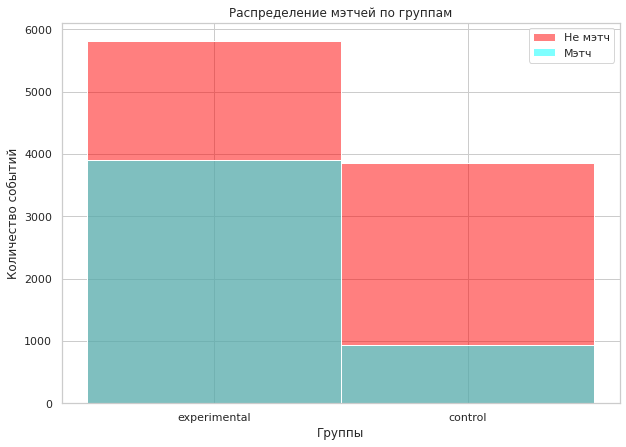

In [7]:
sns.set(font_scale = 1,
        style = 'whitegrid',
       rc = {'figure.figsize' : (10, 7)})

sns.histplot(df, x='group', hue='is_match', palette = ['cyan', 'red'])
plt.title('Распределение мэтчей по группам')
plt.legend(['Не мэтч', 'Мэтч'])
plt.xlabel('Группы')
plt.ylabel('Количество событий')

Основной показатель качества приложения для знакомств - как много мэтчей происходит (как часто алгоритм предлагает подходящие анкеты).

Создаю таблицу сопряженности:

In [8]:
how_much_matches = pd.crosstab(df.group, df.is_match)
how_much_matches

is_match,match,not match
group,,
control,934,3858
experimental,3909,5813


Обе переменные категориальные, буду использовать критерий Хи-квадрат:

In [9]:
stat, pvalue, dof, exp = chi2_contingency(how_much_matches)

Создаю небольшую функцию для проверки p-value:

In [10]:
def hip(p):
    alpha = 0.05
    if p < alpha:
        print('Отклоняем H0')
    else:
        print('Не можем отклонить H0')

In [11]:
hip(pvalue)

Отклоняем H0


Считаю процентное соотношение мэтчей ко всем анкетам со взаимодействиями:

In [12]:
how_much_matches['ratio'] = round((how_much_matches['match'] / (how_much_matches['match'] + how_much_matches['not match'])) * 100, 2)
how_much_matches

is_match,match,not match,ratio
group,,,
control,934,3858,19.49
experimental,3909,5813,40.21


*А/Б-тест показал статистически значимые различия между контрольной и экспериментальной группой.  
Количество мэтчей увеличилось на 20 процентов.  
Есть основания включить новую систему поиска анкет на всех пользователей.*